# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

## **1. Collecting Data** 

### **1.1. About dataset**


This dataset contains **20,000 sales transaction records** for an electronics company over a one-year period, spanning from **September 2023** to **September 2024**. It includes detailed information about customer demographics, product types, and purchase behaviors. It includes **16 distinct attributes** with detail about customer's purchasing behaviors and demographics, aimed at predicting customer trends in the electronics market.

### **1.2. License & Copyright**

#### Released under [**MIT License**](https://www.mit.edu/~amini/LICENSE.md)

- Copyright (c) 2013 Mark Otto.

- Copyright (c) 2017 Andrew Fong.

### **1.3. How did authors collect data?**

- The author, Cameron Seamons, generated this dataset which does not represent real-world transactions or actual customer data. All values in this dataset, including customer IDs, ages, product types, and ratings, are fictitious and created for the purpose of analysis and modeling.

- Initially, the dataset had exactly 50% distribution for both gender and loyalty status. The author adjusted these distributions to make them more realistic. Additionally, customer information remains consistent across all of their orders.

## **2. Exploring Data Analysis (EDA)**

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

**Set Display Options**

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)

**Read data**

In [3]:
df = pd.read_csv('./Data/sales.csv')
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [4]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


### **2.1. How many rows and how many columns?**

In [5]:
n_rows, n_cols = df.shape
print(f'Number of rows: {n_rows}')
print(f'Number of columns: {n_cols}')

Number of rows: 20000
Number of columns: 16


&rarr; There are a total of 20,000 rows and 16 columns

### **2.2. What is the meaning of each row?**

The dataset comprises sales transaction records for individual purchases, with **each row represents an unique purchase**. Each transaction includes **customer information, product details and transaction information**. The data will help to analyze customer behavior and product trends easily.

### **2.3. Are there duplicated rows?**

In [6]:
duplicated_rows = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicated_rows}')

Number of duplicated rows: 0


&rarr; There is no duplicated row in this dataset

### **2.4. What is the meaning of each column?**

In [7]:
column_description = pd.read_csv('./Data/description.csv')
column_description

,Feature,Description
0,Customer ID,Unique identifier for each customer
1,Age,Age of the customer (numeric)
2,Gender,Gender of the customer (Male or Female)
3,Loyalty Member,"(Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)"
4,Product Type,"Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)"
5,SKU,a unique code for each product
6,Rating,Customer rating of the product (1-5 stars) (Should have no Null Ratings)
7,Order Status,"Status of the order (Completed, Cancelled)"
8,Payment Method,"Method used for payment (e.g., Cash, Credit Card, Paypal)"
9,Total Price,Total price of the transaction (numeric)


### **2.5. What is the current data type of each column? Are there columns having inappropriate data types?**

In [8]:
print(f'Current data type of each column:\n\n{df.dtypes}')

Current data type of each column:

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object


In my opinion, the column **"Gender", "Loyalty Member", "Product Type", "SKU", "Order Status", "Payment Method", "Shipping Type"** should be classified into **category groups**. The reasons for this is because they are simply identifiers and do not necessarily have an arithmetic relationship between the columns. Furthermore, the attribute **"Purchase Date"**'s type should also convert into **datetime** type.

**Reformat the columns**

In [9]:
# Convert to category type
category_columns_name = ["Gender", "Loyalty Member", "Product Type", "SKU", "Order Status", "Payment Method", "Shipping Type"]
for col in category_columns_name:
    df[col] = df[col].astype('category')
    
# Convert to datetime type
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%Y-%m-%d')

print(f'Data type of each column after reformatting:\n\n{df.dtypes}')

Data type of each column after reformatting:

Customer ID                   int64
Age                           int64
Gender                     category
Loyalty Member             category
Product Type               category
SKU                        category
Rating                        int64
Order Status               category
Payment Method             category
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type              category
Add-ons Purchased            object
Add-on Total                float64
dtype: object


### **2.6. With each numerical column, how are values distributed?**

**Description**

In this part, for each numerical column, we will calculate:
- `missing_ratio`: Percentage (from 0 to 100) of missing values
- `min`: The min
- `lower_quartile`: The lower quartile (phân vị 25)
- `median`: The median (phân vị 50)
- `upper_quartile`: The upper quartile (phân vị 75)
- `max`: The max

**Calculation**

In [10]:
# Get numerical data frame
numerical_df = df.select_dtypes(include=['number'])

In [11]:
def missing_ratio(series):
    return series.isnull().sum() / len(series) * 100

def lower_quartile(series):
    return series.quantile(0.25)

def upper_quartile(series):
    return series.quantile(0.75)

In [12]:
num_col_info_df = numerical_df.agg([missing_ratio, "min", lower_quartile, "median", upper_quartile, "max"])
num_col_info_df

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
missing_ratio,0.0,0.0,0.0,0.00,0.00,0.0,0.0000
min,1000.0,18.0,1.0,20.75,20.75,1.0,0.0000
lower_quartile,5478.0,33.0,2.0,1139.68,361.18,3.0,7.6150
median,10499.5,49.0,3.0,2534.49,463.96,5.0,51.7000
upper_quartile,15504.0,65.0,4.0,4639.60,791.19,8.0,93.8425
max,19998.0,80.0,5.0,11396.80,1139.68,10.0,292.7700


- In each numerical column, the percentage of missing values is **0%**.
- The range of each numerical column:

|Numerical column |Range (min, max) |
|-----------------|-----------------|
|Customer ID      |(100, 19998)     |
|Age              |(18, 80)         |
|Rating           |(1, 5)           |
|Total Price      |(20.75, 11396.80)|
|Unit Price       |(20.75, 1139.68) |
|Quantity         |(1, 10)          |
|Add-on Total     |(0, 292.77)      |

Except "Customer ID" which is identifier for each customer, all columns have a wide range values, so that there is possible to have many outliers in these attributes.

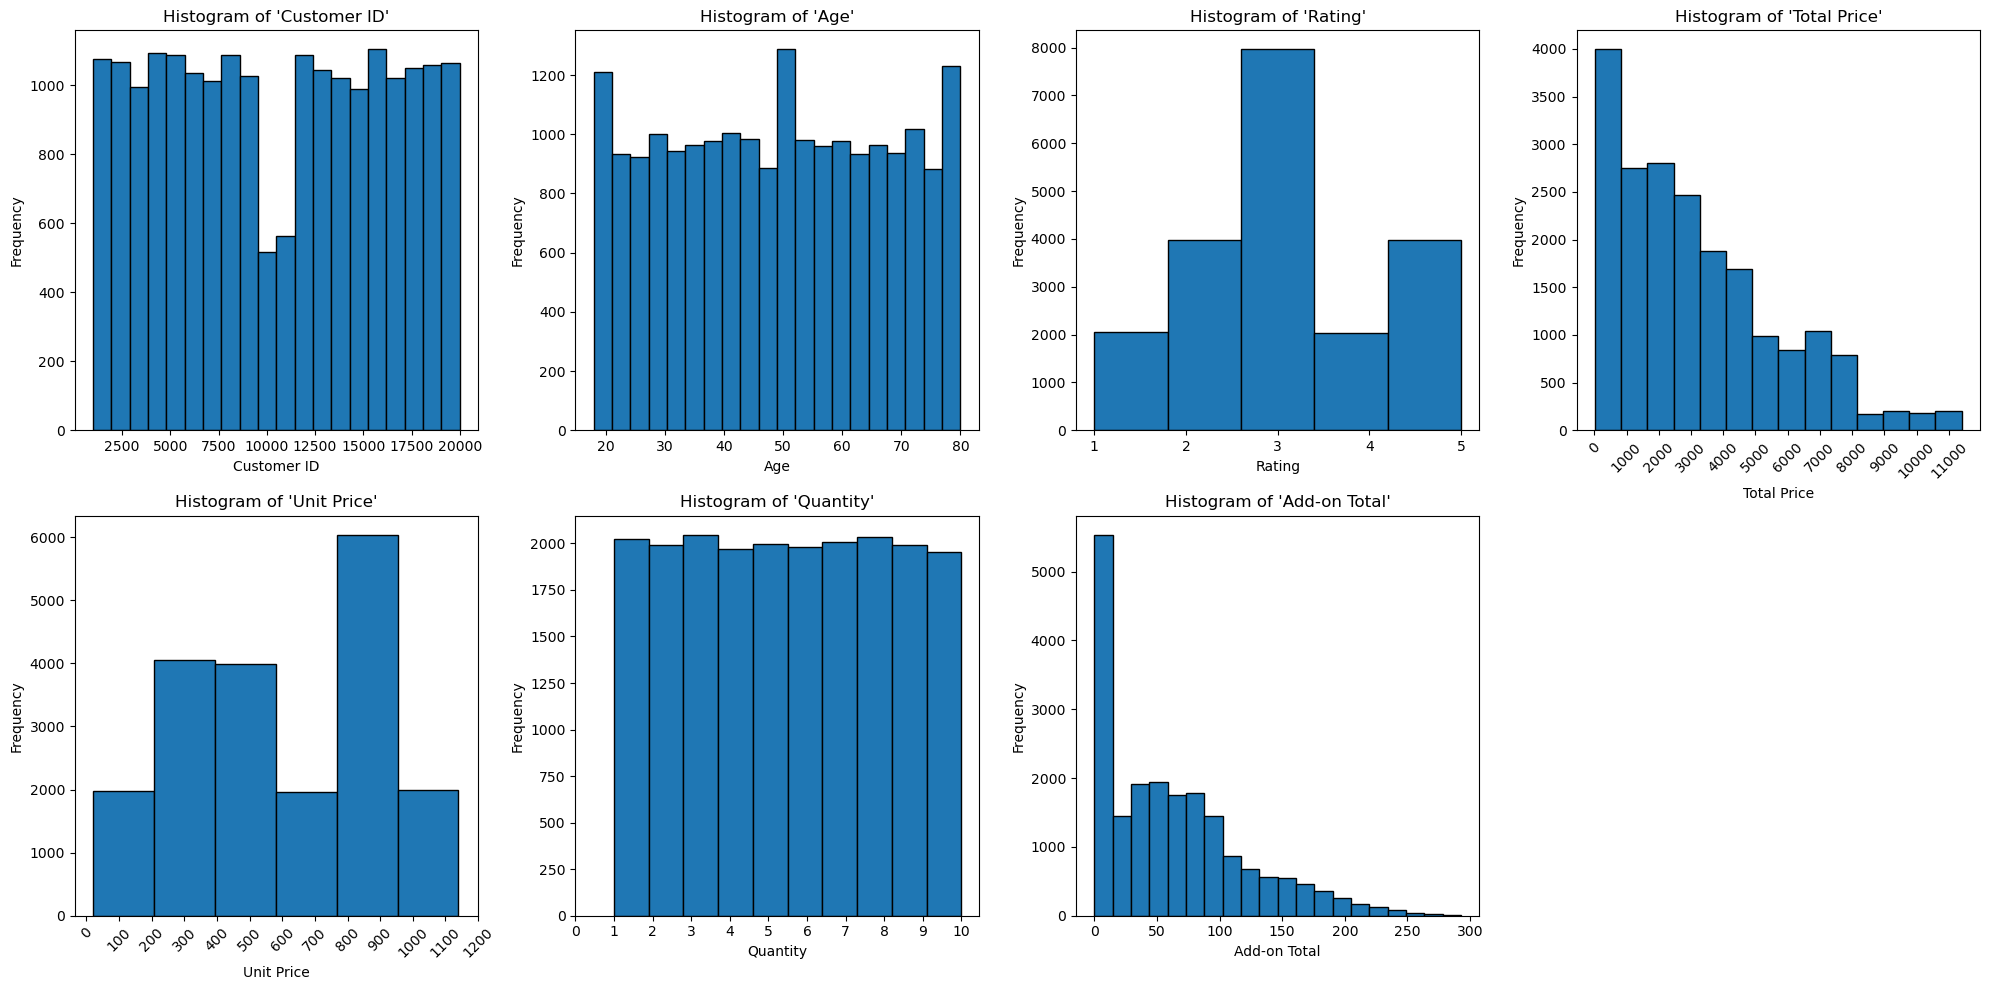

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Histogram of 'Customer ID'
axes[0, 0].hist(numerical_df['Customer ID'], bins=20, edgecolor='black')
axes[0, 0].set_title("Histogram of 'Customer ID'")
axes[0, 0].set_xlabel('Customer ID')
axes[0, 0].set_ylabel('Frequency')

# Histogram of 'Age'
axes[0, 1].hist(numerical_df['Age'], bins=20, edgecolor='black')
axes[0, 1].set_title("Histogram of 'Age'")
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Histogram of 'Rating'
axes[0, 2].hist(numerical_df['Rating'], bins=5, edgecolor='black')
axes[0, 2].set_title("Histogram of 'Rating'")
axes[0, 2].set_xlabel('Rating')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_xticks(range(1, 6))

# Histogram of 'Total Price'
axes[0, 3].hist(numerical_df['Total Price'], bins=14, edgecolor='black')
axes[0, 3].set_title("Histogram of 'Total Price'")
axes[0, 3].set_xlabel('Total Price')
axes[0, 3].set_ylabel('Frequency')
axes[0, 3].set_xticks(range(0, int(numerical_df['Total Price'].max()) + 200, 1000))
plt.setp(axes[0, 3].xaxis.get_majorticklabels(), rotation=45)

# Histogram of 'Unit Price'
axes[1, 0].hist(numerical_df['Unit Price'], bins=6, edgecolor='black')
axes[1, 0].set_title("Histogram of 'Unit Price'")
axes[1, 0].set_xlabel('Unit Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(0, int(numerical_df['Unit Price'].max()) + 100, 100))
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

# Histogram of 'Quantity'
axes[1, 1].hist(numerical_df['Quantity'], edgecolor='black')
axes[1, 1].set_title("Histogram of 'Quantity'")
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(range(0, int(numerical_df['Quantity'].max() + 1)))

# Histogram of 'Add-on Total'
axes[1, 2].hist(numerical_df['Add-on Total'], bins=20, edgecolor='black')
axes[1, 2].set_title("Histogram of 'Add-on Total'")
axes[1, 2].set_xlabel('Add-on Total')
axes[1, 2].set_ylabel('Frequency')

axes[1, 3].axis('off')

plt.tight_layout()

plt.show()


<Axes: >

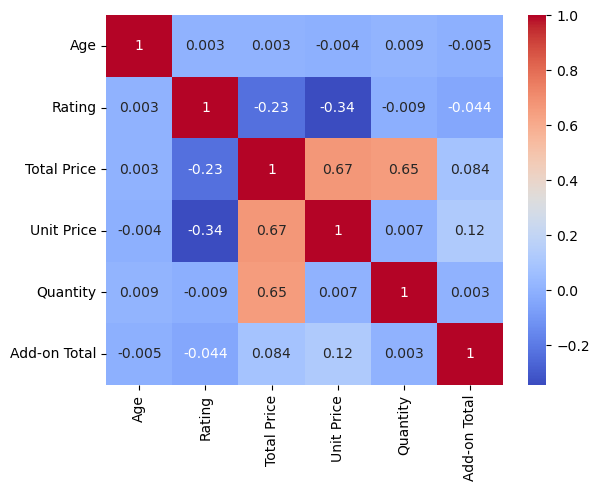

In [14]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.drop(columns=['Customer ID'], errors='ignore').corr().round(3)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

### **2.7.With each categorical column, how are values distributed?**

**Description**

In this part, for each category column, we will calculate:
- `missing_ratio`: Percentage (from 0 to 100) of missing values
- `num_values`: Number of different values (excluding missing values): With columns whose type is categorical, it is a set with a finite number of categories.
- `value_ratios`: The percentage (from 0 to 100) of each value (excluding missing values) is sorted by decreasing percentage.

**Calculation**

In [15]:
# Get category data frame
cat_cols = df.select_dtypes(include=['category', 'object']).drop(columns=['Add-ons Purchased'], errors='ignore')

In [16]:
def missing_ratio(series):
    return series.isna().sum() / len(series) * 100

def num_values(column):
    return column.nunique()

def value_ratios(column):
    value_count_percentage = column.value_counts(normalize=True) * 100
    ratio = value_count_percentage.sort_values(ascending=False).round(2).to_dict()
    return ratio

In [17]:
cat_col_info_df = cat_cols.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Gender,Loyalty Member,Product Type,SKU,Order Status,Payment Method,Shipping Type
missing_ratio,0.005,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,2,5,10,2,6,5
value_ratios,"{'Male': 50.82, 'Female': 49.18}","{'No': 78.29, 'Yes': 21.72}","{'Smartphone': 29.89, 'Tablet': 20.52, 'Laptop': 19.86, 'Smartwatch': 19.67, 'Headphones': 10.06}","{'TBL345': 10.31, 'SKU1002': 10.21, 'SKU1004': 10.1, 'SKU1005': 10.06, 'HDP456': 10.05, 'SMP234': 9.93, 'SWT567': 9.9, 'SKU1001': 9.86, 'LTP123': 9.8, 'SKU1003': 9.78}","{'Completed': 67.16, 'Cancelled': 32.84}","{'Credit Card': 29.34, 'Bank Transfer': 16.86, 'PayPal': 16.42, 'Paypal': 12.57, 'Cash': 12.46, 'Debit Card': 12.35}","{'Standard': 33.62, 'Express': 16.83, 'Overnight': 16.78, 'Same Day': 16.4, 'Expedited': 16.36}"


- Only **'Gender'** attribute has **0.005%**. The percentage of missing value of the remaining column is **0%**.
- For each category column, the values distribute as follow:
  - **'Gender'**:
    - **Male**: 50.82%
    - **Female**: 49.18%
  - **'Loyalty Member'**:
    - **No**: 78.29%
    - **Yes**: 21.71%
  - **'Product Type'**: 
    - **Smartphone**: 29.89% 
    - **Tablet**: 20.52%
    - **Laptop**: 19.86% 
    - **Smartwatch**: 19.67%
    - **Headphones**: 10.06%
  - **'SKU'**:
    - **TBL345**: 10.31%
    - **SKU1002**: 10.21%
    - **SKU1004**: 10.10%
    - **SKU1005**: 10.06%
    - **HDP456**: 10.05%
    - **SMP234**: 9.93%
    - **SWT567**: 9.90%
    - **SKU1001**: 9.86%
    - **LTP123**: 9.80%
    - **SKU1003**: 9.78%
  - **'Order Status'**:
    - **Completed**: 67.16%
    - **Cancelled**: 32.84%
  - **'Payment Method'**:
    - **Credit Card**: 29.34%
    - **Bank Transfer**: 16.86%
    - **PayPal**: 16.42%
    - **Paypal**: 12.57%
    - **Cash**: 12.46%
    - **Debit Card**: 12.35%
  - **'Shipping Type'**: 
    - **Standard**: 33.62%
    - **Express**: 16.83%
    - **Overnight**: 16.78%
    - **Same Day**: 16.40%
    - **Expedited**: 16.36%

For a column has missing values, we need to count how many missing values in this column?

In [18]:
# Count missing values for 'Gender' and 'Add-ons Purchased'
num_missing_value_gender = cat_cols['Gender'].isna().sum()

print(f"Number of missing values in the 'Gender' attribute: {num_missing_value_gender}")

Number of missing values in the 'Gender' attribute: 1


There is only **1** missing value in **'Gender'** column. With a missing value in 'Gender', I will fill it with the gender most appear in this data set.

In [19]:
df['Gender'] = df['Gender'].fillna('Male')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        20000 non-null  int64         
 1   Age                20000 non-null  int64         
 2   Gender             20000 non-null  category      
 3   Loyalty Member     20000 non-null  category      
 4   Product Type       20000 non-null  category      
 5   SKU                20000 non-null  category      
 6   Rating             20000 non-null  int64         
 7   Order Status       20000 non-null  category      
 8   Payment Method     20000 non-null  category      
 9   Total Price        20000 non-null  float64       
 10  Unit Price         20000 non-null  float64       
 11  Quantity           20000 non-null  int64         
 12  Purchase Date      20000 non-null  datetime64[ns]
 13  Shipping Type      20000 non-null  category      
 14  Add-on

In [20]:
# This function plot the 10 values ​​with the highest frequency in the column.
def plot_pie_chart(column, title, ax):
    ratios = value_ratios(column)
    
    top_10_ratios = dict(list(ratios.items())[:10])
    
    labels = list(top_10_ratios.keys())
    sizes = list(top_10_ratios.values())
    
    # plt.figure(figsize=(12, 8))
    ax.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90)
    ax.set_title(title, pad=15)
    plt.axis('equal')

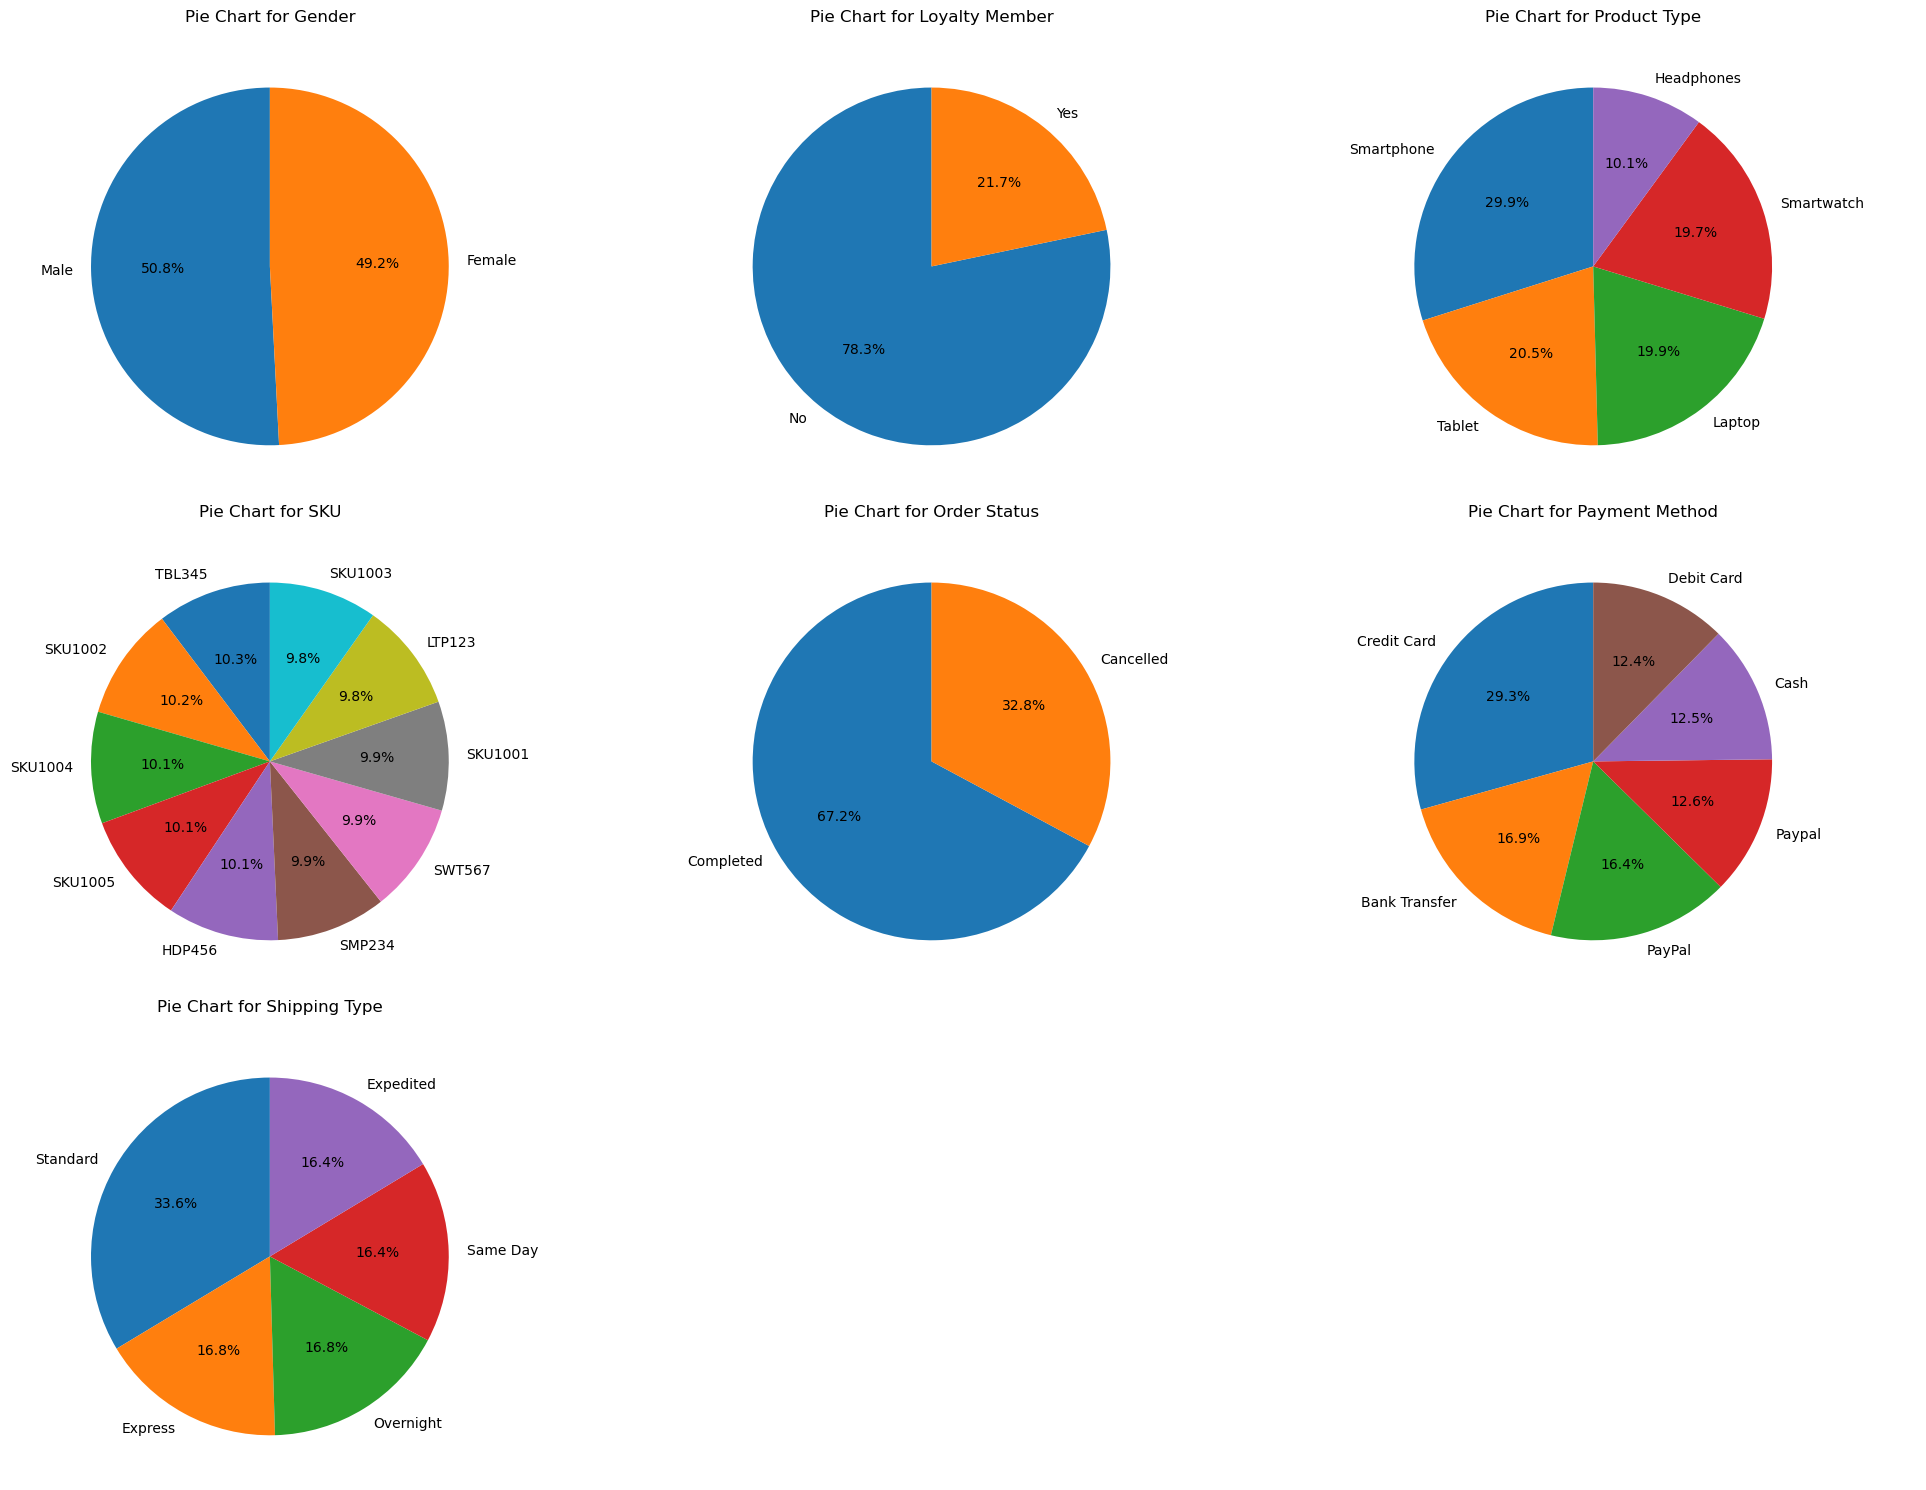

In [21]:
num_cols = len(cat_cols.columns)
rows = (num_cols // 3) + 1  # Số dòng
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(cat_cols.columns):
    plot_pie_chart(df[col], title=f"Pie Chart for {col}", ax=axes[i])

for i in range(num_cols, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [22]:
add_ons = df['Add-ons Purchased'].dropna()  # Remove NaN values
add_ons_split = add_ons.str.split(',').explode() 
cleaned_add_ons = add_ons_split.str.strip()

cleaned_add_ons.unique()

array(['Accessory', 'Impulse Item', 'Extended Warranty'], dtype=object)

In [23]:
print(f"Number of value of 'Add-ons Purchased': {cleaned_add_ons.nunique()}")

Number of value of 'Add-ons Purchased': 3


In [24]:
add_on_counts = cleaned_add_ons.value_counts()
add_on_percentages = (add_on_counts / add_on_counts.sum()) * 100

print(f"Value ratio: {add_on_percentages.round(2)}")

Value ratio: Impulse Item         33.82
Accessory            33.21
Extended Warranty    32.97
Name: Add-ons Purchased, dtype: float64


In [25]:
add_on_counts

Impulse Item         10234
Accessory            10048
Extended Warranty     9975
Name: Add-ons Purchased, dtype: int64

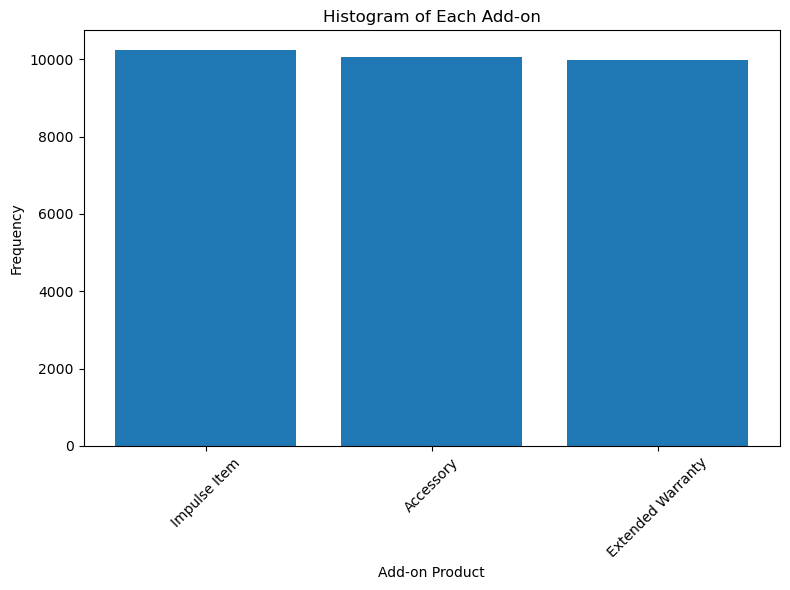

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(add_on_counts.index, add_on_counts.values)
plt.title('Histogram of Each Add-on')
plt.xlabel('Add-on Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **3. Asking Meaning Questions** 

**Question 1**: With each product type, which kind of items that customer usually purchase more?
- Reason: When customers buy a product, we can know what kind of items they will add more. From that, we can make a business strategy to increase the revenue for the company.

**Question 2**: With each product, what type of customers purchased most?
- Reason: To understand clearly what type of product will be suitable for what type of customer, from there can build the right marketing strategy to reach each type of customer and promote the sale of electronic products.

**Question 3**: Which items in each electronics product type is sold the least?
- Reason: To check which product categories have more items or more inventory. From there, businesses can build advertising and sales strategies to limit inventory and import these items later.

## **4. Pre-processing & Analyzing Data to Answer each Questions** 

### **4.1. Question 1**

In [27]:
import itertools

# Create a copy of relevant columns and fill NaNs
product_type_add_on = df[['Product Type', 'Add-ons Purchased']].copy()
product_type_add_on["Add-ons Purchased"].fillna("None", inplace=True)

# Extract unique add-on values excluding 'None'
add_on_values = product_type_add_on["Add-ons Purchased"].str.split(",").explode().str.strip()
add_on_values = add_on_values[add_on_values != "None"].unique()

# Add columns for each individual add-on
for add_on in add_on_values:
	product_type_add_on[add_on] = product_type_add_on["Add-ons Purchased"].str.contains(add_on)

# Generate all possible non-empty combinations of add-ons
add_on_combinations = []
for r in range(2, len(add_on_values)+1):
	combinations = itertools.combinations(add_on_values, r)
add_on_combinations.extend([", ".join(combo) for combo in combinations])

# Add columns for each add-on combination
for combo in add_on_combinations:
	components = combo.split(", ")
product_type_add_on[combo] = product_type_add_on[components].all(axis=1)

# Drop the original 'Add-ons Purchased' column
product_type_add_on.drop(columns=["Add-ons Purchased"], inplace=True)

product_type_add_on

,Product Type,Accessory,Impulse Item,Extended Warranty,"Accessory, Impulse Item, Extended Warranty"
0,Smartphone,True,False,False,False
1,Tablet,False,True,False,False
2,Laptop,False,False,False,False
3,Smartphone,False,True,False,False
4,Smartphone,True,False,False,False
...,...,...,...,...,...
19995,Smartphone,False,False,False,False
19996,Laptop,False,False,False,False
19997,Headphones,True,True,True,True
19998,Headphones,True,False,True,False


C:\Users\thanh\AppData\Local\Temp\ipykernel_24088\2165019837.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
C:\Users\thanh\AppData\Local\Temp\ipykernel_24088\2165019837.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)


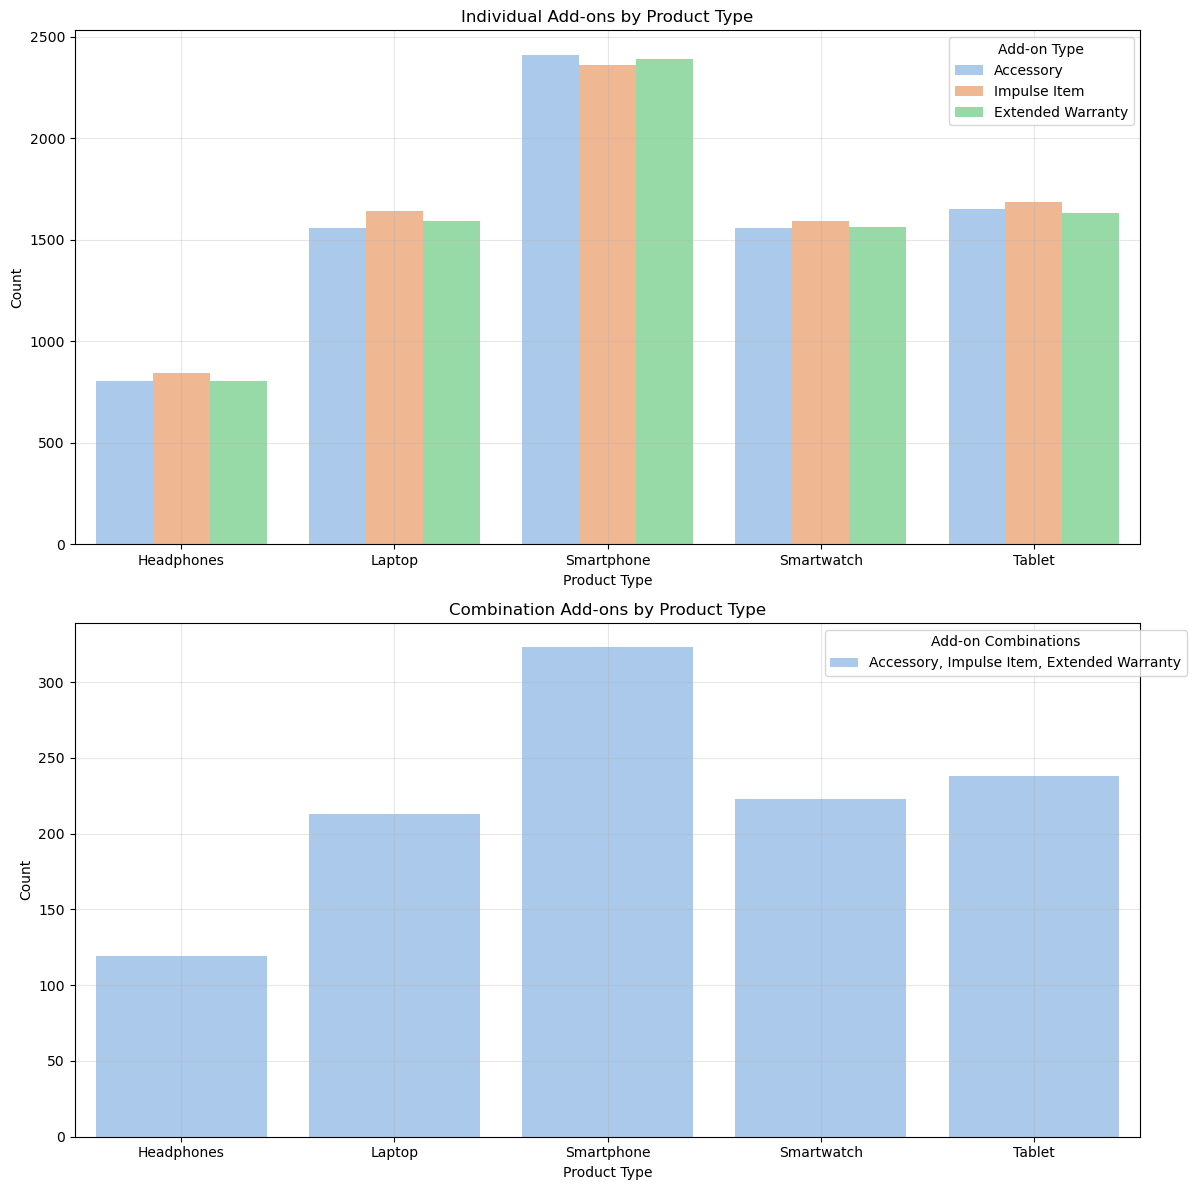

In [28]:
# Create a summary DataFrame grouping by Product Type
summary_df = product_type_add_on.groupby('Product Type').sum().reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot individual add-ons using seaborn
summary_df_individual = summary_df[['Product Type'] + list(add_on_values)]
indiv_melt = summary_df_individual.melt(
    id_vars='Product Type', var_name='Add-on Type', value_name='Count')
sns.barplot(data=indiv_melt, x='Product Type', y='Count',
            hue='Add-on Type', ax=ax1, palette='pastel')
ax1.set_title('Individual Add-ons by Product Type')
ax1.set_ylabel('Count')
ax1.legend(title='Add-on Type')
ax1.grid(True, alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Plot combination add-ons using seaborn
combo_addons = [
    value for value in add_on_combinations if value not in add_on_values]
summary_df_combo = summary_df[['Product Type'] + combo_addons]
combo_melt = summary_df_combo.melt(
    id_vars='Product Type', var_name='Add-on Combination', value_name='Count')
sns.barplot(data=combo_melt, x='Product Type', y='Count',
            hue='Add-on Combination', ax=ax2, palette='pastel')
ax2.set_title('Combination Add-ons by Product Type')
ax2.set_ylabel('Count')
ax2.legend(title='Add-on Combinations', bbox_to_anchor=(1.05, 1))
ax2.grid(True, alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

The number of each item added on by product type is similar. For more specific, *Impulse Item* is **the most popular** add-ons in most of product type. This can suggest that customers tend to add small extras when shopping electronic products. Meanwhile, when purchasing **Smartphone**, they tend to buy more accessory items. Moreover, the number of *Extended Warranty* in electronic products which often used in daily life such as **Laptop, Smartphone, Smartwatch** is also high, which show that the need for product protection.

### **4.2. Question 2**

In [29]:
def categorize_age(age):
    if 0 <= age and age < 18:
        return "Child"
    elif 18 <= age and age < 45:
        return "Adult"
    elif 45 <= age and age <= 65:
        return "Middle Age"
    elif age > 65:
        return "Old elderly"
    else:
        return "Unknown"

In [30]:
temp_df = df.copy()

temp_df["Age Category"] = temp_df["Age"].apply(categorize_age)

temp_df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Category
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,Middle Age
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,Middle Age
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,Adult
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,Adult
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,Old elderly


In [31]:
age_category_counts =  temp_df.groupby(["Product Type", "Age Category"]).size().unstack()

age_category_counts


Age Category,Adult,Middle Age,Old elderly
Product Type,,,
Headphones,902,658,451
Laptop,1727,1329,917
Smartphone,2531,2065,1382
Smartwatch,1685,1291,958
Tablet,1769,1332,1003


In [32]:
age_category_gender_counts = temp_df.groupby(["Product Type", "Gender", "Age Category"]).size().unstack(level=-1)

age_category_gender_counts

Age Category         Adult  Middle Age  Old elderly
Product Type Gender                                
Headphones   Female    418         321          228
             Male      484         337          223
Laptop       Female    864         659          448
             Male      863         670          469
Smartphone   Female   1314         984          682
             Male     1217        1081          700
Smartwatch   Female    841         603          457
             Male      844         688          501
Tablet       Female    881         643          492
             Male      888         689          511

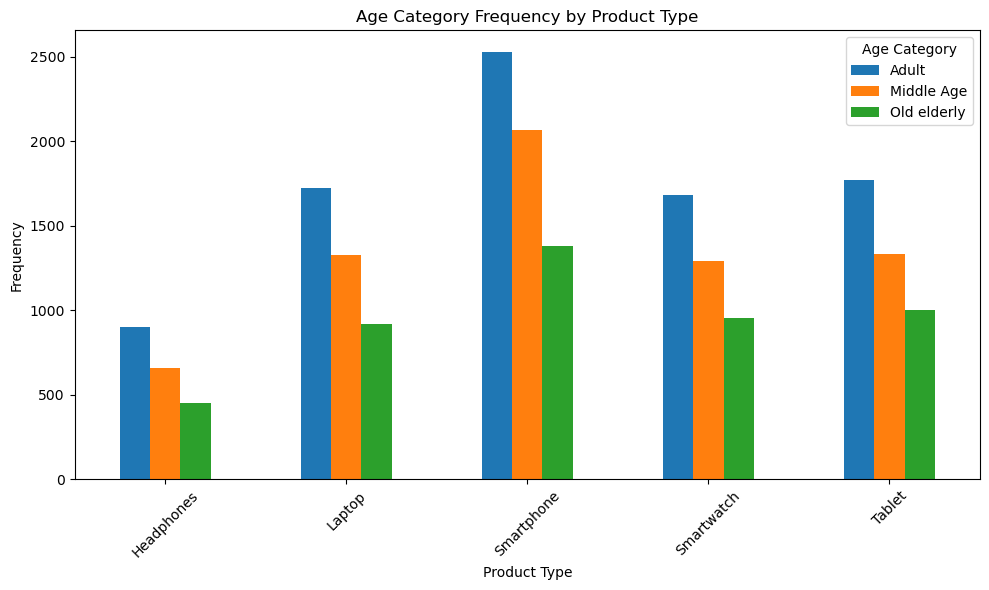

In [33]:
age_category_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Age Category Frequency by Product Type")
plt.ylabel("Frequency")
plt.xlabel("Product Type")
plt.legend(title="Age Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

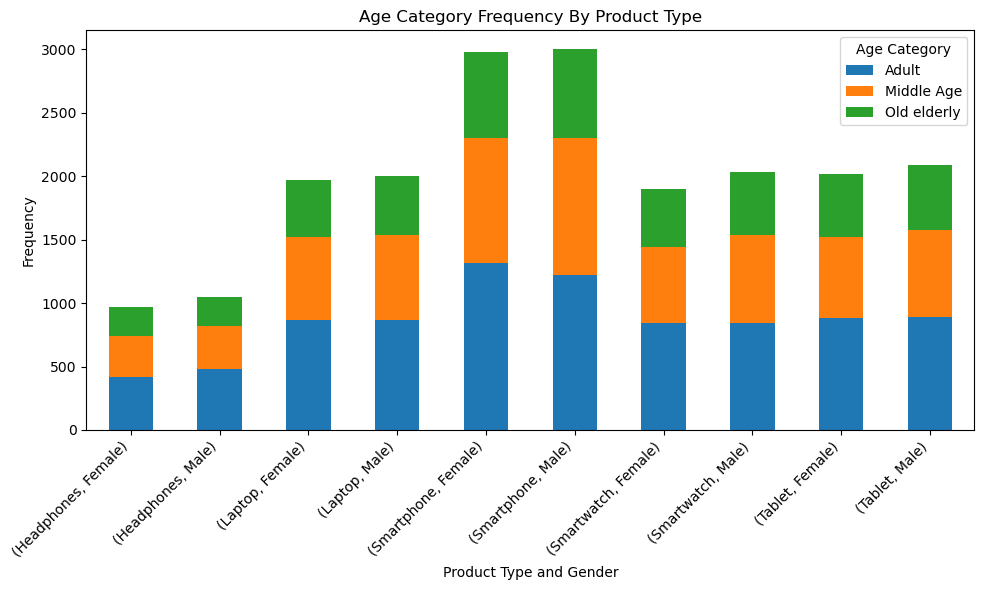

In [34]:
age_category_gender_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Age Category Frequency By Product Type')
plt.xlabel('Product Type and Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Category', loc='upper right')
plt.tight_layout()

plt.show()

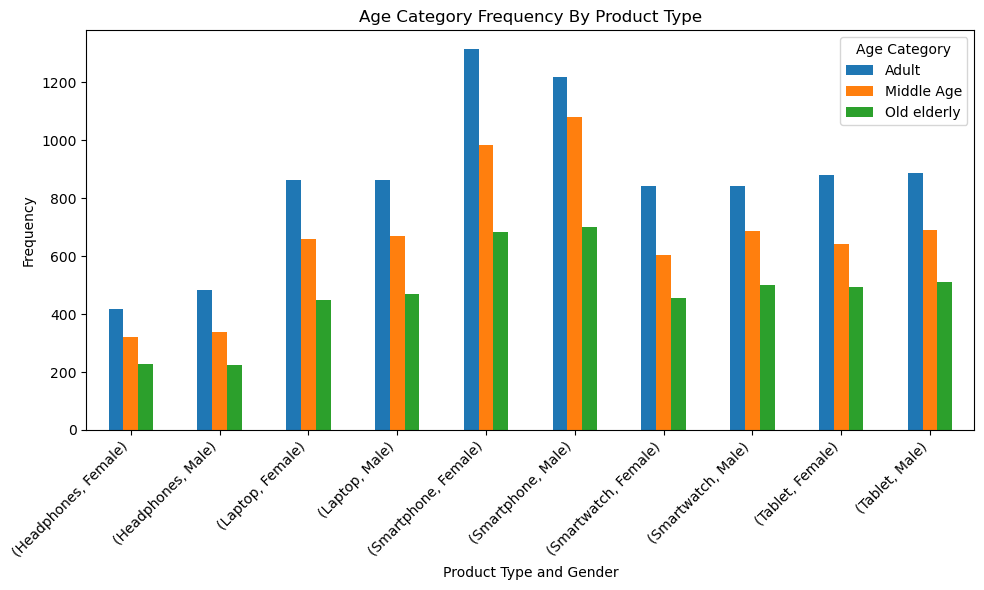

In [35]:
age_category_gender_counts.plot(kind='bar', figsize=(10, 6), stacked=False)

plt.title('Age Category Frequency By Product Type')
plt.xlabel('Product Type and Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Category', loc='upper right')
plt.tight_layout()

plt.show()

- 'Adults' dominate all product categories in this dataset, so we can make marketing campaigns which could focus on their preferences and needs, such as convenience, functionality, and value.
- Meanwhile, secondary groups such as Middle-aged or Elderly people also account for a large number of Laptop and Tablet products besides Smartphone product.

=> This insight allows businesses to allocate resources efficiently and enhance sales by reaching the right audience with tailored messaging.

### **4.3 Question 3**

In [36]:
completed_orders = temp_df[temp_df['Order Status'] == 'Completed'].reset_index()

completed_orders.head()


,index,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Category
0,1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,Middle Age
1,2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,Adult
2,3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,Adult
3,4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,Old elderly
4,5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,Adult


In [37]:
completed_orders['SKU'] = completed_orders['SKU'].astype(str)

unique_sku_by_type = completed_orders.groupby('Product Type')['SKU'].unique()

pd.DataFrame(unique_sku_by_type)

,SKU
Product Type,
Headphones,"[SKU1003, HDP456]"
Laptop,"[SKU1005, SKU1004, LTP123]"
Smartphone,"[SKU1004, SKU1001, SKU1005, SMP234]"
Smartwatch,"[SKU1003, SWT567]"
Tablet,"[SKU1002, TBL345]"


In [38]:
sold_sku = completed_orders.groupby(['Product Type', 'SKU'])['Quantity'].sum().reset_index().rename(columns={'Quantity': 'Total Sold'})
sold_sku

,Product Type,SKU,Total Sold
0,Headphones,HDP456,7560
1,Headphones,LTP123,0
2,Headphones,SKU1001,0
3,Headphones,SKU1002,0
4,Headphones,SKU1003,5
5,Headphones,SKU1004,0
6,Headphones,SKU1005,0
7,Headphones,SMP234,0
8,Headphones,SWT567,0
9,Headphones,TBL345,0


In [39]:
sku_map = unique_sku_by_type.to_dict()
sku_map

{'Headphones': array(['SKU1003', 'HDP456'], dtype=object),
 'Laptop': array(['SKU1005', 'SKU1004', 'LTP123'], dtype=object),
 'Smartphone': array(['SKU1004', 'SKU1001', 'SKU1005', 'SMP234'], dtype=object),
 'Smartwatch': array(['SKU1003', 'SWT567'], dtype=object),
 'Tablet': array(['SKU1002', 'TBL345'], dtype=object)}

In [40]:
dfs_filtered = []

for product_type, skus in sku_map.items():
    df_sub = sold_sku[sold_sku["Product Type"] == product_type]
    
    df_sub_filtered = df_sub[df_sub["SKU"].isin(skus)]
    
    dfs_filtered.append(df_sub_filtered)

df_sku_type_filtered = pd.concat(dfs_filtered, ignore_index=True)
df_sku_type_filtered

,Product Type,SKU,Total Sold
0,Headphones,HDP456,7560
1,Headphones,SKU1003,5
2,Laptop,LTP123,7511
3,Laptop,SKU1004,3
4,Laptop,SKU1005,7109
5,Smartphone,SKU1001,7179
6,Smartphone,SKU1004,7377
7,Smartphone,SKU1005,4
8,Smartphone,SMP234,7387
9,Smartwatch,SKU1003,7131


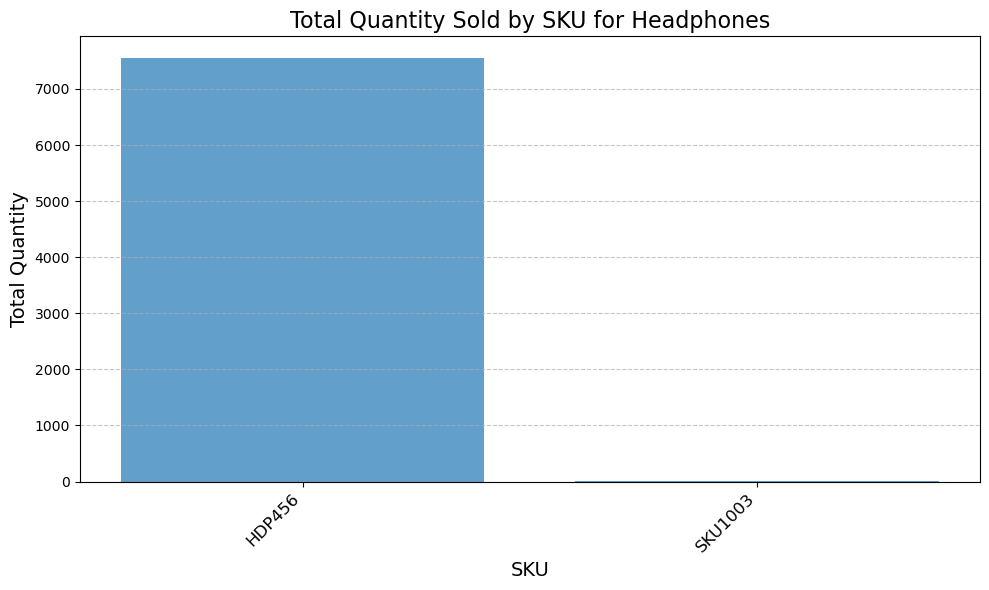

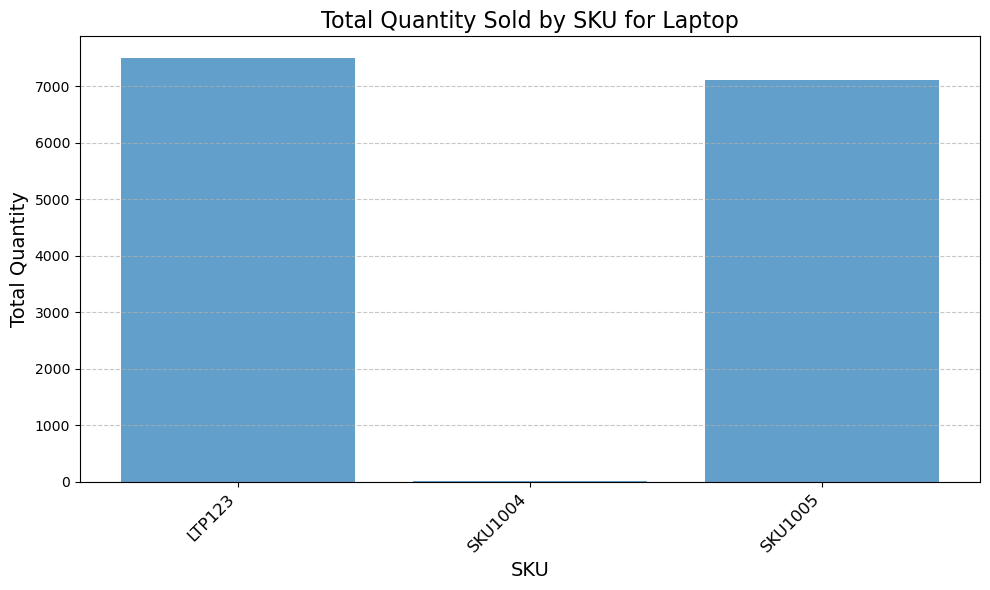

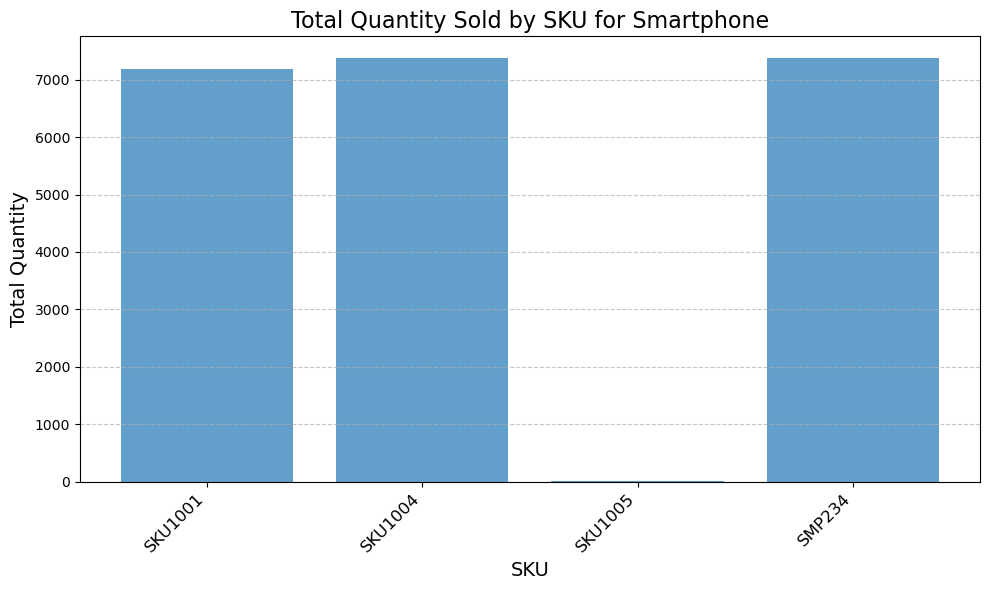

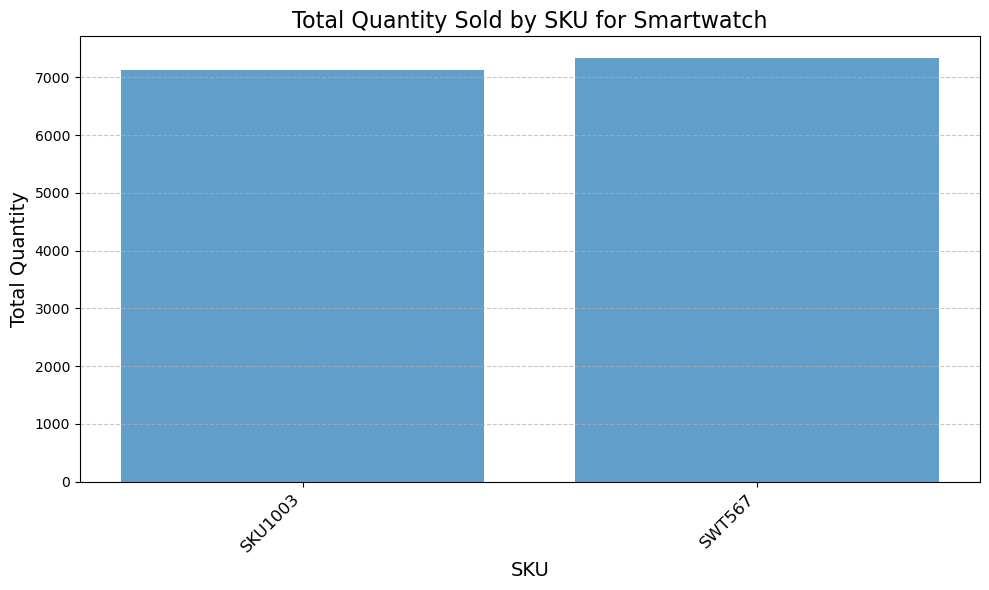

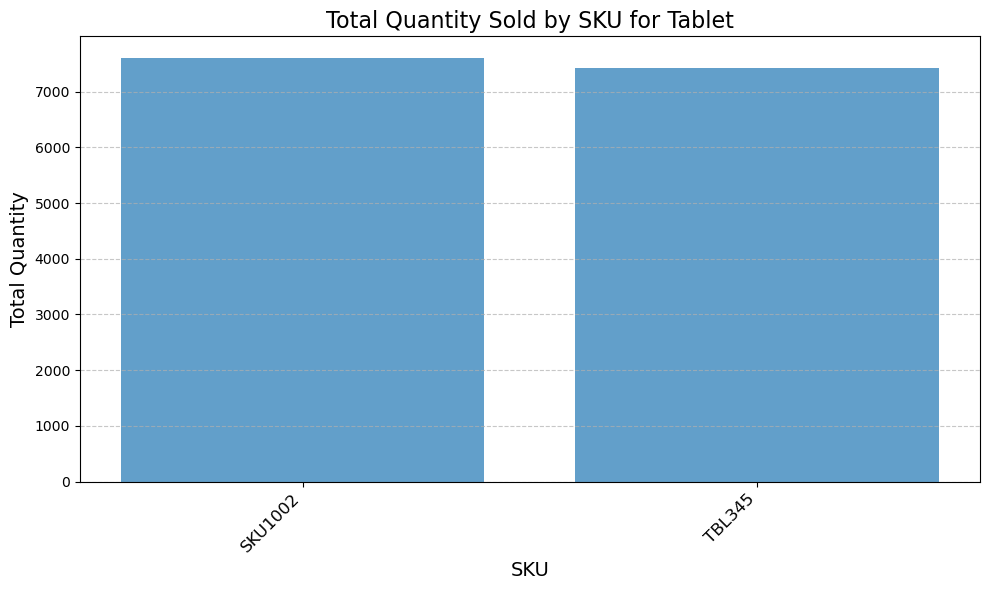

In [41]:
for product_type in df_sku_type_filtered['Product Type'].unique():
    df_filtered = df_sku_type_filtered[df_sku_type_filtered['Product Type'] == product_type]
    
    plt.figure(figsize=(10, 6))
    plt.bar(df_filtered['SKU'], df_filtered['Total Sold'], alpha=0.7)
    plt.title(f"Total Quantity Sold by SKU for {product_type}", fontsize=16)
    plt.xlabel("SKU", fontsize=14)
    plt.ylabel("Total Quantity", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


- SKU1003 in Headphones is being sold very little (5 products have been sold) compared to HDP456 in Headphones (7560 products have been sold)
- In Laptops, LTP123 and SKU1005 products are sold a lot, 7511 and 7109 in order. Meanwhile, SKU1004 products only sold 3 products.
- Similar to Smartphones, only SKU1005 is sold very little, only 4 products.
- Tablets in all product codes are sold more evenly, without much difference.

=> Businesses should find a business strategy to sell difficult-to-sell items and at the same time limit the import of those types of products

## **5. Reflection**

### **5.1. What difficulties have you encountered?**

The data preprocessing stage is one of the important stages and fortunately, the data in this dataset is relatively clean. However, the lack of knowledge on this issue made it quite difficult for me in Exploratory Data Analysis (EDA) phase to be able to ask meaningful questions based on this dataset. This problem caused me to spend quite a lot of time to choose the most reasonable questions that I could within my ability.              

### **5.2. What have you learned?**

Through this project, I have gained a basic understanding of the stages of data science. At the same time, I have also improved and learned more about data processing and visualization skills.

## **References**

- Slides and lectures in Programming for Data Science course by Teacher Pham Trong Nghia
- Electronic Sales Data [Dataset](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)
- Plot any charts with [matplotlib](https://matplotlib.org/stable/gallery/index.html#examples-index)